## 哈里斯角点检测
$$
E(u,v)=\sum_{x,y}\underbrace{w(x,y)}_{\text{window function}}[\underbrace{I(x+u,y+v)}_{\text{shift intensity}}-\underbrace{I(x,y)}_{\text{intensity}}]^2  
$$

相关公式推导: https://blog.csdn.net/hujingshuang/article/details/46829627

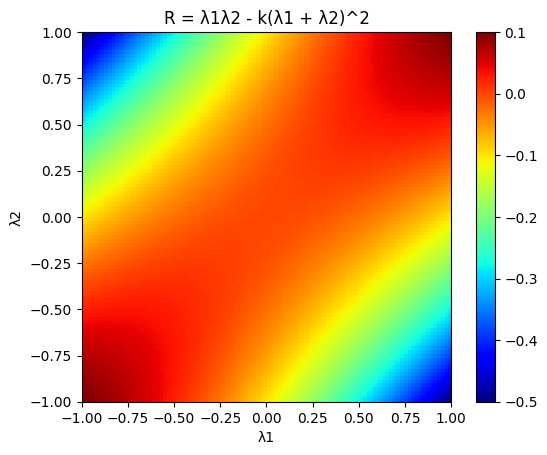

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# 定义参数范围和步长
lambda_range = np.linspace(-1, 1, 100)
k = 0.1

# 计算每个点的 R 值
R = lambda_range * np.outer(lambda_range, -k) - k * (lambda_range + lambda_range[:, np.newaxis])**2

# 绘制图像
plt.imshow(R, cmap='jet', extent=[-1, 1, -1, 1])
plt.colorbar()
plt.xlabel('λ1')
plt.ylabel('λ2')
plt.title('R = λ1λ2 - k(λ1 + λ2)^2')
plt.show()


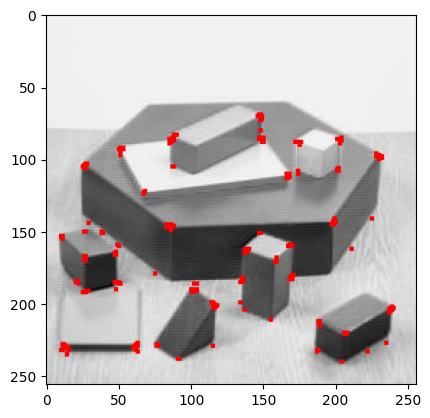

In [35]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread("../data/blox.jpg")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result用于标记角点，并不重要
dst = cv.dilate(dst,None)
#最佳值的阈值，它可能因图像而异。
img[dst>0.01*dst.max()]=[255,0,0]
plt.imshow(img)
plt.show()


In [33]:
import numpy as np
import cv2 as cv

filename = '../data/messi5.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 寻找哈里斯角
# 输入图像必须是float32类型，最后一个参数在0.04到0.05之间选择
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)

# 膨胀以更好地标记角点
dst = cv.dilate(dst, None)

# 应用阈值以得到二值图像
ret, dst = cv.threshold(dst, 0.01 * dst.max(), 255, 0)
dst = np.uint8(dst)

# 寻找角点的质心
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)

# 定义停止和完善拐角的条件
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)

# 返回值由角点的位置组成
corners = cv.cornerSubPix(gray, np.float32(centroids), (5, 5), (-1, -1), criteria)

# 绘制角点
res = np.hstack((centroids, corners))
res = np.int0(res)
img[res[:, 1], res[:, 0]] = [0, 0, 255]  # 绘制红色的角点质心
img[res[:, 3], res[:, 2]] = [0, 255, 0]  # 绘制绿色的完善角点位置

cv.imshow('dst', img)
cv.waitKey(0)
cv.destroyAllWindows()


C:\Users\28678\AppData\Local\Temp\ipykernel_41780\2890993253.py:23: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  res = np.int0(res)
